In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import glob
import os

In [ ]:
os.listdir("input")

In [2]:
uninfected = glob.glob("input/Uninfected/*.png")
infected = glob.glob("input/Parasitized/*.png")

In [3]:
uninfected_imgs = [(cv2.imread(i, 0)) for i in uninfected]
infected_imgs = [(cv2.imread(i, 0)) for i in infected]

In [ ]:
type(uninfected_imgs)

In [ ]:
type(infected_imgs)

In [ ]:
len(uninfected_imgs)


In [ ]:
uninfected_imgs[200]

In [4]:
uninfected_imgs = [cv2.resize(i, (2500, 1), interpolation = cv2.INTER_AREA).reshape(2500, 1) for i in uninfected_imgs]

In [5]:
infected_imgs = [cv2.resize(i, (2500, 1), interpolation = cv2.INTER_AREA).reshape((2500, 1)) for i in infected_imgs]

In [6]:
uninfected_imgs = np.array(uninfected_imgs)
infected_imgs = np.array(infected_imgs)

In [ ]:
print(uninfected_imgs.shape)
print(infected_imgs.shape)

In [ ]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import math

cell = infected_imgs[500]
cell_image = cell.reshape(infected_imgs[500].shape[0], infected_imgs[500].shape[1])

plt.imshow(cell_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
plt.axis("off")
plt.show()

In [7]:
a = [[i,np.array([0])] for i in uninfected_imgs]

In [8]:
a += [[i,np.array([1])] for i in infected_imgs]

In [9]:
a = np.array(a)

In [10]:
a.shape

(27558, 2)

In [11]:
type(a[0])

numpy.ndarray

In [ ]:
type(a[1])

In [12]:
for i in range(25):
    np.random.shuffle(a)

In [13]:
X = np.array([i[0] for i in a])
Y = np.array([i[1] for i in a])
X.reshape(27558, 2500, 1)
print(X.shape)
print(Y.shape)

(27558, 2500, 1)
(27558, 1)


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 42)
X_train = X_train[:, :, 0]
X_test = X_test[:, :, 0]
Y_train = Y_train[:, 0]
Y_test = Y_test[:, 0]
print(Y_train.shape)
print(Y_test.shape)

(18463,)
(9095,)


In [17]:
from sklearn import svm
clf = svm.SVC(kernel = 'rbf')
clf.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [19]:
clf.score(X_train, Y_train)

0.9735145967610898

In [20]:
clf.score(X_test, Y_test)

0.5179769103903243

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, Y_train)

In [ ]:
tree_clf.score(X_train, Y_train)

In [ ]:
tree_clf.score(X_test, Y_test)

In [62]:
import keras
from keras.models import Sequential, Input, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [63]:
uninfected = glob.glob("input/Uninfected/*.png")
infected = glob.glob("input/Parasitized/*.png")
uninfected_imgs = [(cv2.imread(i, 0)) for i in uninfected]
infected_imgs = [(cv2.imread(i, 0)) for i in infected]
uninfected_imgs = [cv2.resize(i, (50, 50), interpolation = cv2.INTER_AREA).reshape(50, 50, 1) for i in uninfected_imgs]
uninfected_imgs = np.array(uninfected_imgs)

In [64]:
infected_imgs= [cv2.resize(i, (50, 50), interpolation = cv2.INTER_AREA).reshape(50, 50, 1) for i in infected_imgs]
infected_imgs = np.array(infected_imgs)

In [65]:
print(uninfected_imgs.shape)
print(infected_imgs.shape)

(13779, 50, 50, 1)
(13779, 50, 50, 1)


In [66]:
a = [[i,np.array([0])] for i in uninfected_imgs]
a += [[i,np.array([1])] for i in infected_imgs]
a = np.array(a)

In [67]:
for i in range(25):
    np.random.shuffle(a)

In [68]:
X = np.array([i[0] for i in a])
Y = np.array([i[1] for i in a])

In [69]:
print(X.shape)
print(Y.shape)

(27558, 50, 50, 1)
(27558, 1)


In [70]:
Y = Y.reshape(27558,)
print(Y.shape)

(27558,)


In [71]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size = 0.2)

In [72]:
print(train_X.shape)
print(test_X.shape)
print(train_Y.shape)
print(test_Y.shape)

(22046, 50, 50, 1)
(5512, 50, 50, 1)
(22046,)
(5512,)


In [73]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255
test_X = test_X / 255

In [74]:
from keras.utils import to_categorical
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

In [75]:
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs: ', nClasses)
print('Output classes : ', classes)

Total number of outputs:  2
Output classes :  [0 1]


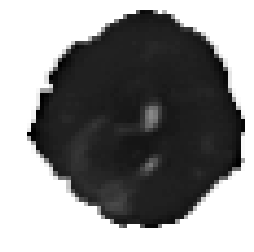

In [76]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import math

cell = infected_imgs[500]
cell_image = cell.reshape(infected_imgs[500].shape[0], infected_imgs[500].shape[1])

plt.imshow(cell_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
plt.axis("off")
plt.show()

Text(0.5,1,'Cell : 0')

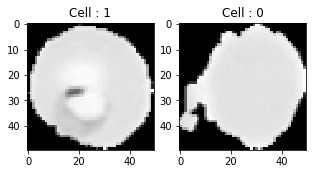

In [77]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:, 0], cmap='gray')
plt.title("Cell : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:, 0], cmap='gray')
plt.title("Cell : {}".format(test_Y[0]))

In [78]:
train_X, valid_X, train_label, valid_label = train_test_split(train_X, train_Y_one_hot, test_size = 0.2)

In [79]:
train_X.shape, valid_X.shape, train_label.shape, valid_label.shape

((17636, 50, 50, 1), (4410, 50, 50, 1), (17636, 2), (4410, 2))

In [80]:
batch_size = 64
epochs = 20
num_classes = 2

In [87]:
malaria_model = Sequential()
malaria_model.add(Conv2D(32, kernel_size = (3, 3), activation = 'linear', input_shape = (50, 50, 1), padding = 'same'))

In [88]:
malaria_model.add(LeakyReLU(alpha = 0.1))
malaria_model.add(MaxPooling2D((2,2), padding = 'same'))
malaria_model.add(Conv2D(64, (3, 3), activation = 'linear', padding = 'same'))
malaria_model.add(LeakyReLU(alpha = 0.1))
malaria_model.add(MaxPooling2D(pool_size = (2, 2), padding = 'same'))
malaria_model.add(Dropout(0.25))
malaria_model.add(Conv2D(128, (3, 3), activation = 'linear', padding = 'same'))
malaria_model.add(LeakyReLU(alpha = 0.1))
malaria_model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
malaria_model.add(Dropout(0.25))
malaria_model.add(Flatten())
malaria_model.add(Dense(128, activation = 'linear'))
malaria_model.add(LeakyReLU(alpha = 0.1))
malaria_model.add(Dropout(0.3))
malaria_model.add(Dense(num_classes, activation = 'softmax'))

In [89]:
malaria_model.compile(loss = keras.losses.categorical_crossentropy, optimizer = keras.optimizers.Adam(), metrics = ['accuracy'])

In [90]:
malaria_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 50, 50, 32)        320       
_________________________________________________________________
leaky_re_lu_11 (LeakyReLU)   (None, 50, 50, 32)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 25, 25, 64)        18496     
_________________________________________________________________
leaky_re_lu_12 (LeakyReLU)   (None, 25, 25, 64)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 13, 13, 64)        0         
__________

In [91]:
malaria_train = malaria_model.fit(train_X, train_label, batch_size = batch_size, epochs = epochs, verbose = 1, validation_data = (valid_X, valid_label))

Train on 17636 samples, validate on 4410 samples
Epoch 1/20
17636/17636 [==============================] - 77s 4ms/step - loss: 0.6552 - acc: 0.6044 - val_loss: 0.4851 - val_acc: 0.7580
Epoch 2/20
17636/17636 [==============================] - 76s 4ms/step - loss: 0.3068 - acc: 0.8692 - val_loss: 0.2058 - val_acc: 0.9222
Epoch 3/20
17636/17636 [==============================] - 76s 4ms/step - loss: 0.1889 - acc: 0.9299 - val_loss: 0.1666 - val_acc: 0.9367
Epoch 4/20
17636/17636 [==============================] - 75s 4ms/step - loss: 0.1666 - acc: 0.9372 - val_loss: 0.1553 - val_acc: 0.9395
Epoch 5/20
17636/17636 [==============================] - 76s 4ms/step - loss: 0.1520 - acc: 0.9457 - val_loss: 0.1505 - val_acc: 0.9447
Epoch 6/20
17636/17636 [==============================] - 77s 4ms/step - loss: 0.1404 - acc: 0.9494 - val_loss: 0.1521 - val_acc: 0.9424
Epoch 7/20
17636/17636 [==============================] - 77s 4ms/step - loss: 0.1298 - acc: 0.9515 - val_loss: 0.1572 - val_acc:

In [92]:
test_eval = malaria_model.evaluate(test_X, test_Y_one_hot, verbose = 0)

In [93]:
print("Test loss: ", test_eval[0])
print("Test accuracy: ", test_eval[1])

Test loss:  0.19980378844031824
Test accuracy:  0.9470246734397678


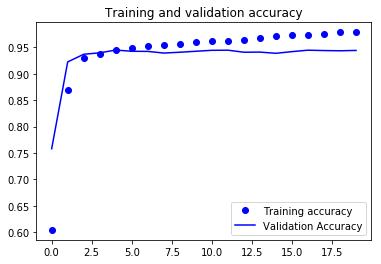

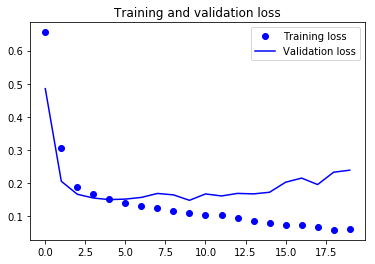

In [94]:
accuracy = malaria_train.history['acc']
val_accuracy = malaria_train.history['val_acc']
loss = malaria_train.history['loss']
val_loss = malaria_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label = 'Validation Accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


In [95]:
y_score_train = malaria_model.predict_classes(train_X)
y_score_validate = malaria_model.predict_classes(valid_X)
y_score_test = malaria_model.predict_classes(test_X)

In [96]:
train_label_score = train_label[:, 1]
print(train_label_score.shape)
valid_label_score = valid_label[:, 1]
print(valid_label_score.shape)
test_label_score = test_Y_one_hot[:, 1]
print(test_label_score.shape)

(17636,)
(4410,)
(5512,)


In [98]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
train_accuracy = accuracy_score(train_label_score, y_score_train)
print('Training Accuracy: %f' %train_accuracy)
train_precision = precision_score(train_label_score, y_score_train)
print('Training Precision: %f' %train_precision)
train_recall = recall_score(train_label_score, y_score_train)
print('Training Recall: %f' %train_recall)
validation_accuracy = accuracy_score(valid_label_score, y_score_validate)
print('Validation accuracy: %f' %validation_accuracy)
validation_precision = precision_score(valid_label_score, y_score_validate)
print('Validation precision: %f' %validation_precision)
validation_recall = recall_score(valid_label_score, y_score_validate)
print('Validation recall: %f' %validation_recall)
test_accuracy = accuracy_score(test_label_score, y_score_test)
print('Test accuracy: %f' %test_accuracy)
test_precision = precision_score(test_label_score, y_score_test)
print('Test precision: %f' %test_precision)
test_recall = recall_score(test_label_score, y_score_test)
print('Test recall: %f' %test_recall)

Training Accuracy: 0.990077
Training Precision: 0.992823
Training Recall: 0.987312
Validation accuracy: 0.943991
Validation precision: 0.955963
Validation recall: 0.932438
Test accuracy: 0.947025
Test precision: 0.953610
Test recall: 0.938167


In [99]:
malaria_model.save("malaria_model_with_dropout.h5py")